### Starship analysis!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\Delta v_T=\Delta v$ needed to go TO B from A,

$\Delta v_F=\Delta v$ needed to go FROM B to A,

$P=$ propellant capacity,

$p=$ propellant to B from A,

$m_F=$ payload (in metric tons) from end to start,

$m_T=$ payload (in metric tons) to end from start,

$M=$ dry mass of vehicle,

$v_e=$ exhaust velocity,

$T=e^{\frac{\Delta v_T}{v_e}}$,

$F=e^{\frac{\Delta v_F}{v_e}}$,

$k=\frac{1-T}{T(F-1)}$,

$c=\frac{P + M(1-TF)}{T(F-1)}$,

and the relation between $m_F$ and $m_T$ is $m_F=km_T+c$,

where max payload to B from A is $\frac{-c}{k}=\frac{P + M(1-TF)}{T-1}$,

max payload to A from B is $c$,

and propellant to B from A is given by $p=\kappa m_T+\epsilon$,

where $\kappa=\frac{1-T}{T}$ and $\epsilon=\frac{P+M(1-T)}{T}$.

In [2]:
eT = lambda ve, vT: np.exp(vT / ve)
eF = lambda ve, vF: np.exp(vF / ve)
K = lambda T, F: (1 - T) / (T * (F - 1))
C = lambda P, M, T, F: (P + M * (1 - T * F)) / (T * (F - 1))
KAP = lambda T: (1 - T) / T
EPS = lambda P, M, T: (P + M * (1 - T)) / T
rPROP = lambda P, M, T, mT: KAP(T) * mT + EPS(P, M, T) 
nPROP = lambda M, mT, T: (M + mT) * (T - 1)

In [3]:
def maxmT(P, M, ve, vT, vF):
    T, F = eT(ve, vT), eF(ve, vF)
    return (P + M * (1 - T * F)) / (T - 1)

def maxmF(P, M, ve, vT, vF):
    T, F = eT(ve, vT), eF(ve, vF)
    return C(P, M, T, F)

def MF(P, M, ve, vT, vF, mT):
    T, F = eT(ve, vT), eF(ve, vF)
    return K(T, F) * mT + C(P, M, T, F)

In [19]:
P, M = 1300, 100
ve, vM, vGTO, vLEO = 3724, 5583, 3975, 2270
T = eT(ve, vM)
mT = np.arange(0, 110)
mF = MF(P, M, ve, vM, vGTO, mT)
rP = rPROP(P, M, T, mT)

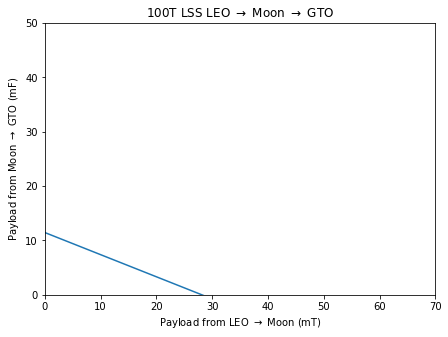

In [20]:
fig = plt.figure(figsize=(7, 5))
plt.title(r"100T LSS LEO $\rightarrow$ Moon $\rightarrow$ GTO")
plt.xlabel(r"Payload from LEO $\rightarrow$ Moon (mT)")
plt.ylabel(r"Payload from Moon $\rightarrow$ GTO (mF)")
plt.xlim(0, 70)
plt.ylim(0, 50)
plt.xticks(np.arange(0, 80, 10))
plt.yticks(np.arange(0, 60, 10))
plot = plt.plot(mT, mF)
plt.show()

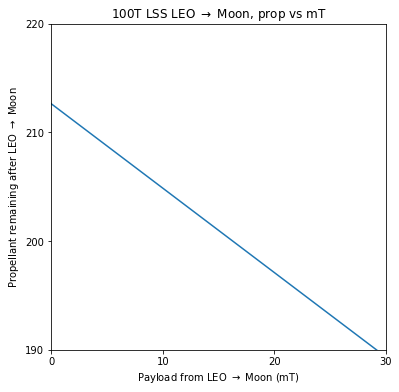

In [25]:
fig = plt.figure(figsize=(6, 6))
plt.title(r"100T LSS LEO $\rightarrow$ Moon, prop vs mT")
plt.xlabel(r"Payload from LEO $\rightarrow$ Moon (mT)")
plt.ylabel(r"Propellant remaining after LEO $\rightarrow$ Moon")
plt.xlim(0, 30)
plt.ylim(190, 220)
plt.xticks(np.arange(0, 40, 10))
plt.yticks(np.arange(190, 230, 10))
plot = plt.plot(mT, rP)
plt.show()

In [26]:
mM, mGTO = 10, 10 # payload to Moon surface and payload from GTO to LEO
mP = rPROP(P, M, T, mM) # propellant left in LSS after LEO -> Moon transfer
rGTOP = rPROP(mP, M - 5, eT(ve, vGTO), mGTO) # propellant left in LSS after Moon -> GTO transfer
nLEOP = nPROP(M - 5, mGTO, eT(ve, vLEO)) # propellant LSS needs for GTO -> LEO transfer
tankers = (nLEOP - rGTOP) / 100 # tankers LSS needs for GTO -> LEO transfer

In [27]:
print(f"propellant left in LSS after LEO -> Moon transfer - {round(mP, 2)}T")
print(f"propellant left in LSS after Moon -> GTO transfer - {round(rGTOP, 2)}T")
print(f"propellant LSS needs for GTO -> LEO transfer - {round(nLEOP, 2)}T")
print(f'# GTO tanker flights needed - {tankers}')

propellant left in LSS after LEO -> Moon transfer - 204.87T
propellant left in LSS after Moon -> GTO transfer - 1.56T
propellant LSS needs for GTO -> LEO transfer - 88.16T
# GTO tanker flights needed - 0.8659652941793202
